# Grade Determination due to Socio-Demographic information of Students


The data was obtained in a survey of students math courses in secondary school. It contains a lot of interesting social, gender and study information about students. It is pulled from Kaggel data set source -

https://www.kaggle.com/datasets/uciml/student-alcohol-consumption

The goal of this analysis and model building analysis is to which socio-demographic properties of students influence the grades of the students and if we can do something about it to influence the grades of the students.


We will start with the data loading and start exploring the dataset and observe what is the type of the data and which model may suit the analysis and explore its performance along with the multiple models and compare its performance along with the naive model or mean models. 

If the model works well and is able to identify more accurate reults, it be great to use it and make impact to the life of the students. 




In [1]:
# Import the libraries needed for the project
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import dmba
import matplotlib.pyplot as plt
%matplotlib inline
# Library to show all the colums in jupyter notebook
from IPython.display import display

import ipywidgets as widgets
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from dmba import regressionSummary, exhaustive_search,classificationSummary
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from dmba import classificationSummary, gainsChart, liftChart

from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans

no display found. Using non-interactive Agg backend


## Load the data set to the dataframe and explore the dataset


In [2]:
# Set the variable to display the columns while running the code for head or describe
temp_data_load = pd.read_csv("student-por.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
temp_data_load.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


## Description of Variable and Data Understanding

The dataset has the below attributes and the information about those attributes is mentioned below. 

Our area of interest is to understand the final grades i.e. G3 for the students and predict with more accuracy and see if could influence the grades of students who are lagging behind. 


    school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
    sex - student's sex (binary: 'F' - female or 'M' - male)
    age - student's age (numeric: from 15 to 22)
    address - student's home address type (binary: 'U' - urban or 'R' - rural)
    famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
    Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
    Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
    guardian - student's guardian (nominal: 'mother', 'father' or 'other')
    traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
    studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
    failures - number of past class failures (numeric: n if 1<=n<3, else 4)
    schoolsup - extra educational support (binary: yes or no)
    famsup - family educational support (binary: yes or no)
    paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
    activities - extra-curricular activities (binary: yes or no)
    nursery - attended nursery school (binary: yes or no)
    higher - wants to take higher education (binary: yes or no)
    internet - Internet access at home (binary: yes or no)
    romantic - with a romantic relationship (binary: yes or no)
    famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
    freetime - free time after school (numeric: from 1 - very low to 5 - very high)
    goout - going out with friends (numeric: from 1 - very low to 5 - very high)
    Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
    Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
    health - current health status (numeric: from 1 - very bad to 5 - very good)
    absences - number of school absences (numeric: from 0 to 93)
    These grades are related to the course subject for Portuguese:
    G1 - first period grade (numeric: from 0 to 20)
    G2 - second period grade (numeric: from 0 to 20)
    G3 - final grade (numeric: from 0 to 20, output target)

# Exploratory Data Analysis and Data Cleaning

### Transaction insights and understanding data ranges

The uniqueness data analysis on the data shows that most of the attributes are categorical or ordinal with absence and grades being ony continuous variables. 

Also G1, G2 G3 are three grades with G3 being the final grades. 

It gets tricky to identify all the grades and hence we will just focus on the final grades. 


In [3]:
temp_data_load.apply(lambda x: x.unique())

school                                                 [GP, MS]
sex                                                      [F, M]
age                            [18, 17, 15, 16, 19, 22, 20, 21]
address                                                  [U, R]
famsize                                              [GT3, LE3]
Pstatus                                                  [A, T]
Medu                                            [4, 1, 3, 2, 0]
Fedu                                            [4, 1, 2, 3, 0]
Mjob                [at_home, health, other, services, teacher]
Fjob                [teacher, other, services, health, at_home]
reason                        [course, other, home, reputation]
guardian                                [mother, father, other]
traveltime                                         [2, 1, 3, 4]
studytime                                          [2, 3, 1, 4]
failures                                           [0, 3, 1, 2]
schoolsup                               

### Datatype Disctionary for data Loaded

Define a dictionary to mannually define the datatypes so we could later change it and make it more consistent to process

In [4]:
# Define column data types
column_dtype_dict = {'school':'category', 'sex' : 'category', 'age': 'category', 'address':'category',
                     'famsize':'category', 'Pstatus':'category', 'Medu': 'category', 'Fedu':'category',
                     'Mjob':'category', 'Fjob':'category', 'reason':'category', 'guardian':'category',
                     'traveltime':'category', 'studytime':'category','failures':'category', 'schoolsup':'category',
                     'famsup':'category', 'paid':'category', 'activities':'category', 'nursery':'category',
                     'higher':'category', 'internet':'category', 'romantic':'category', 'famrel':'category',
                     'freetime':'category', 'goout':'category', 'Dalc':'category','Walc':'category', 
                     'health':'category', 'absences':'int64', 'G1':'int64', 'G2':'int64', 'G3':'int64'}
#temp_data_load = temp_data_load.astype(column_dtype_dict)
temp_data_load.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

### Summarized facts of the data loaded like Mean, unique, counts, Std and percentiles

In [5]:
temp_data_load.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,649,2,GP,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,649,2,F,383,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,649.0,NaN,NaN,NaN,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
address,649,2,U,452,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,649,2,GT3,457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,649,2,T,569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,649.0,NaN,NaN,NaN,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,NaN,NaN,NaN,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
Mjob,649,5,other,258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fjob,649,5,other,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Limiting the Scope of Analysis for Dependent Variable and Defining the dependent Variable

As we discussed above we are going to limit our analysis to G3 only we can drop rest of the grade columns and focus on the final grades

In [6]:
temp_data_load = temp_data_load.drop(['G1','G2'], axis =1)
temp_data_load.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,13


## Distribution Analysis of the data 

Here we will observe the trend in data fields and see if we have any insights which are not obvious and give us any information that could be useful in identifying the dataset. 

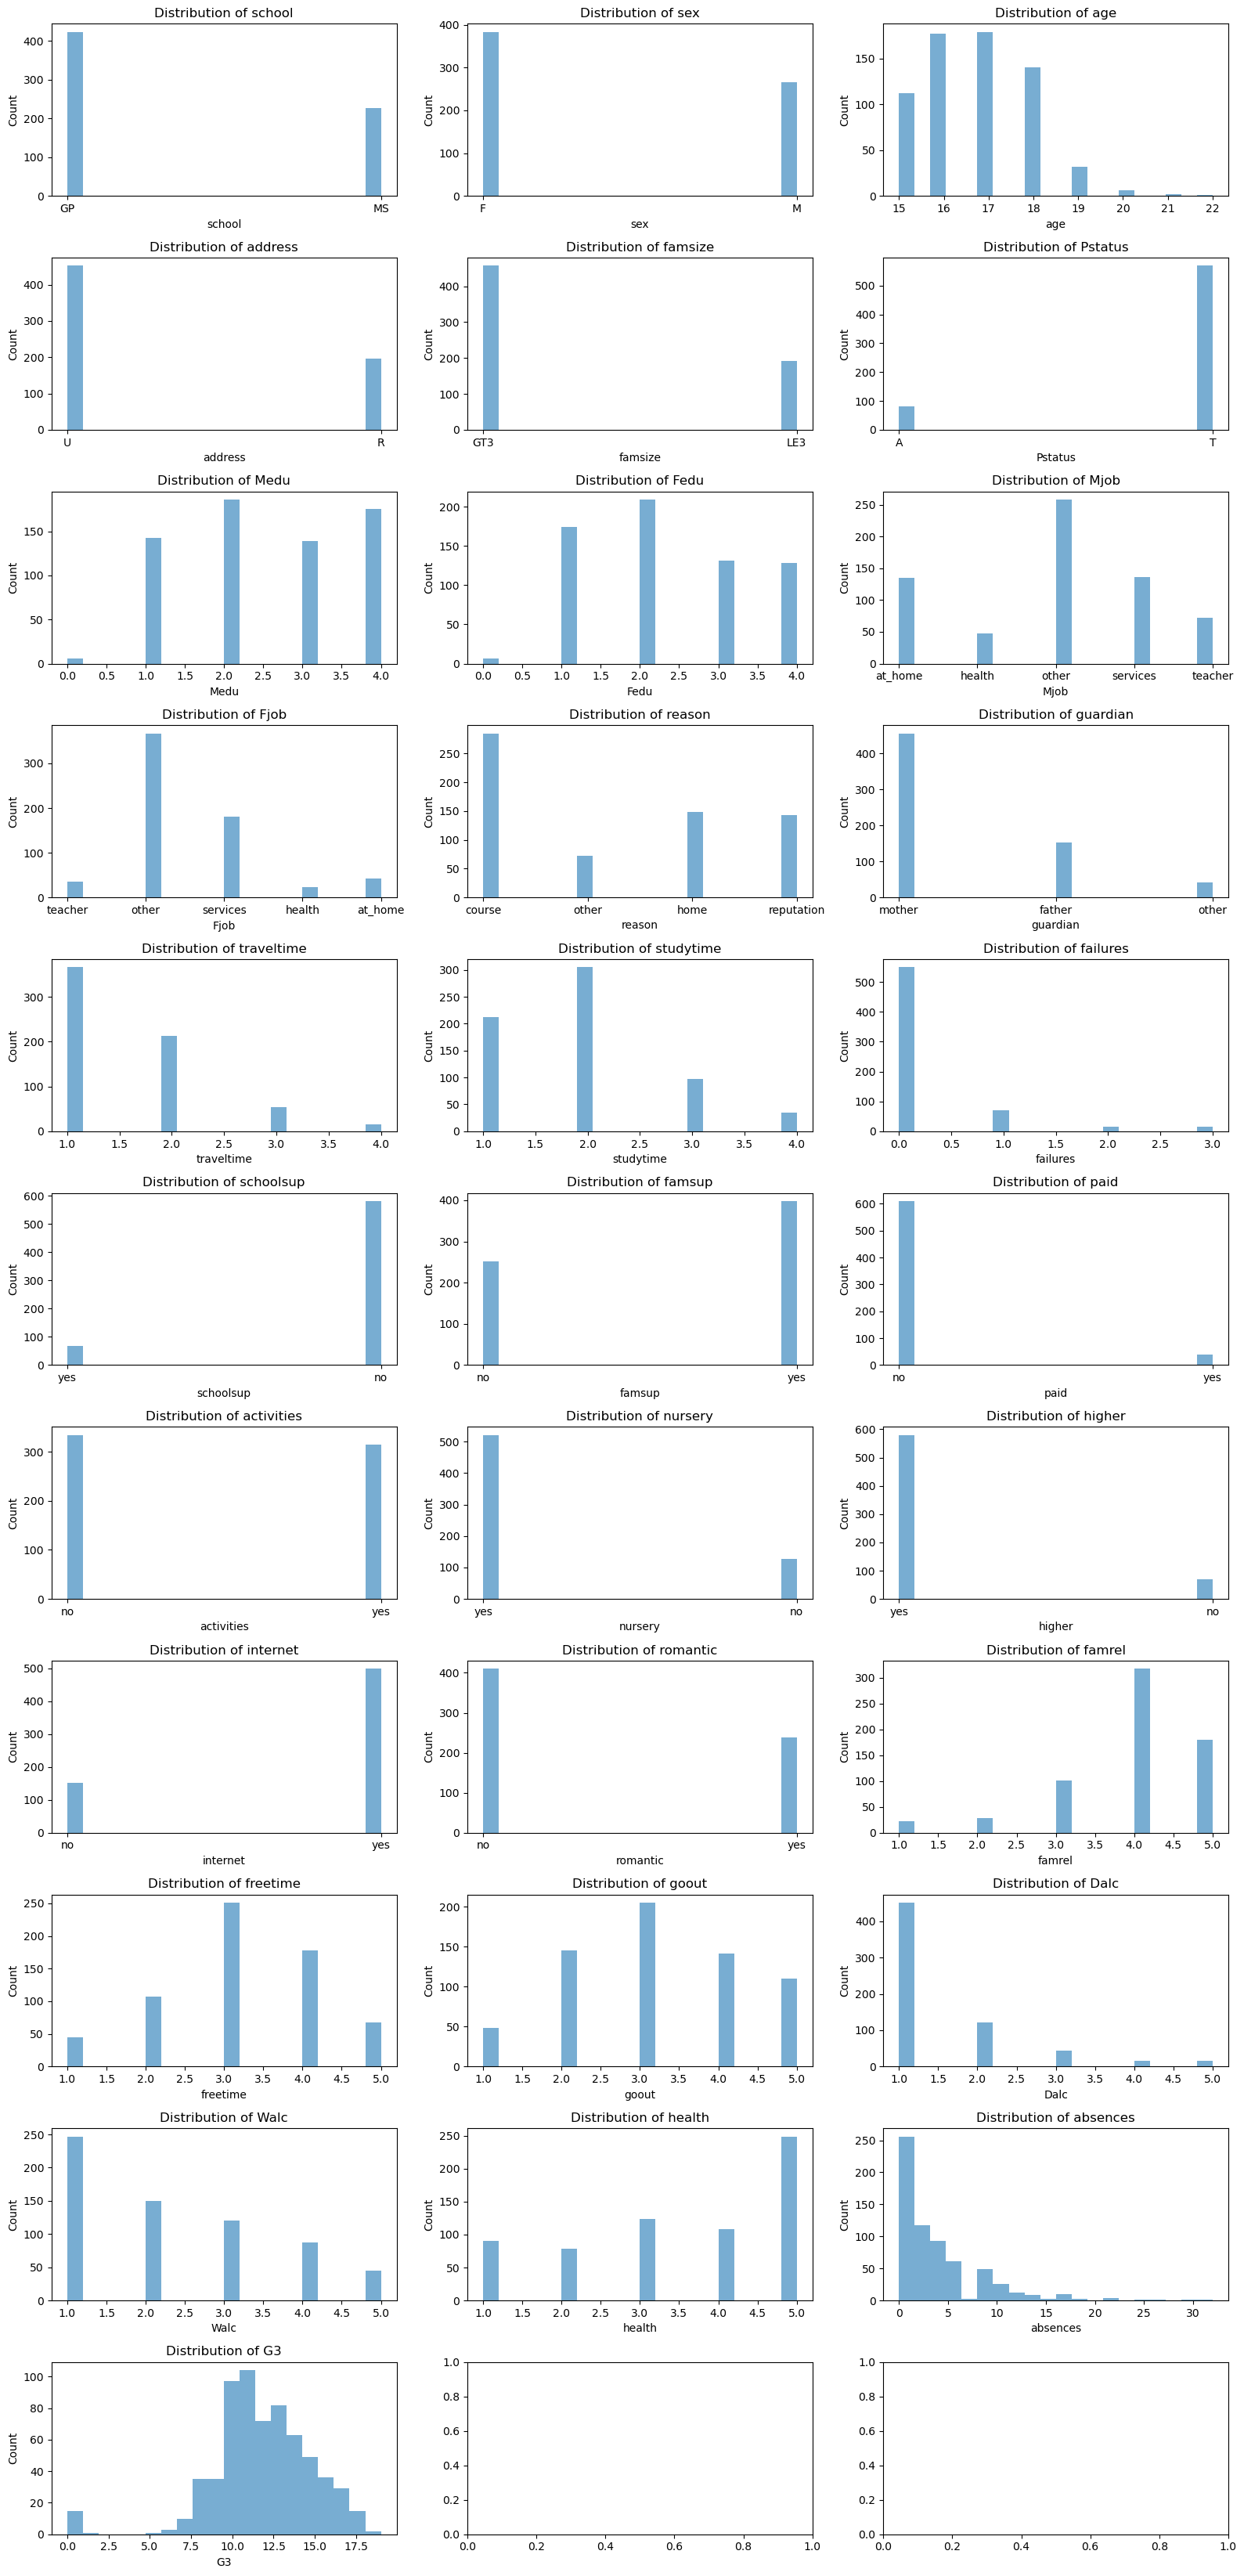

In [7]:
# Calculate the number of rows needed to display the subplots
num_cols = len(temp_data_load.columns)
num_rows = (num_cols - 1) // 3 + 1

# Create a figure and subplots for each column
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(16, 3*num_rows))

# Plot the distribution graphs for each column
for i, column in enumerate(temp_data_load.columns):
    row_idx = i // 3
    col_idx = i % 3
    axes[row_idx, col_idx].hist(temp_data_load[column], bins=20, density=False, alpha=0.6)
    axes[row_idx, col_idx].set_title(f'Distribution of {column}')
    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_ylabel('Count')

# Adjust the spacing between subplots for better presentation
plt.tight_layout()

# Show the plots
plt.show()


### One point brief summary of observations

    1. School - GP has almost twice the students against the MS
    2. Number of female students are slightly higher than Male students
    3. There are only few students are older than 19-22 and most of the students fall in the range of 15-18
    4. Most of the students are Urban
    5. Many of the students have larger families in comparison to samller families
    6. Most of the students parents are staying together
    7. With the absence counts in low ranges it means that most of the students prefer to come to college or take fewer leaves. 
    8. Weekend Alcohol and Daily alcholol consumption is always true and in certain cases the students drink 5 times weekend  as well. 
    9. Students often go out mean mean around 3 times a week.
    
### Below is the widget model to show us the above graphs in more clarity and you can choose the attrubute. 
    

### Use the Widgest to Select a column for its Graph for better view and option to Select

In [8]:
def plot_distribution(column):
    plt.figure(figsize=(5, 3))
    plt.hist(temp_data_load[column], bins=20, density=False, alpha=0.6)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

# Create a selection widget to choose the column
column_selector = widgets.Dropdown(
    options=temp_data_load.columns,
    description='Choose a column:',
    disabled=False,
)

# Apply the plotting function when the widget value changes
widgets.interactive(plot_distribution, column=column_selector)

interactive(children=(Dropdown(description='Choose a column:', options=('school', 'sex', 'age', 'address', 'fa…

# G3 Grade distribution using Boxplot

It seems we have some outliers in the data.  It means only few students have very low grades. This will make the matrix have bias towards those grades and our will have shift in the trend due to these outliers. 

We can remove those records and do the data analysis on the pending records.

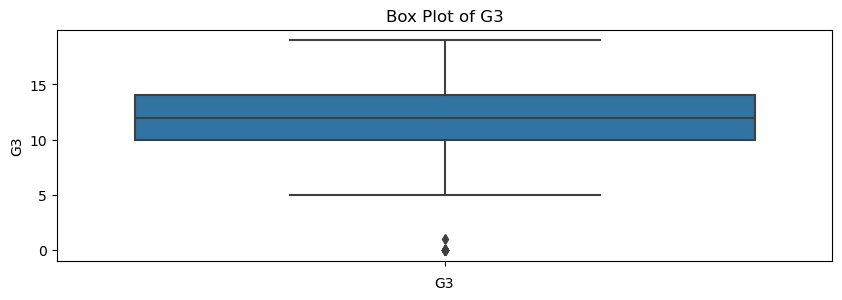

In [9]:
# boxplot the G3 and understand the distribution of the data.  We can also identify the outliers and take actions based on it.

plt.figure(figsize=(10, 3))
sns.boxplot(y=temp_data_load['G3'])
plt.title('Box Plot of G3')
plt.xlabel('G3')
plt.show()

### Remove the outlier G3 records from the data

Let's drop if there is any outlier in the dependent data to avoid any skewenees in the model. 

In [10]:
# Function to remove outliers based on box plot
def remove_outliers(df, column, multiplier=1.5):
    Q1 = temp_data_load[column].quantile(0.25)
    Q3 = temp_data_load[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    return temp_data_load[(temp_data_load[column] >= lower_bound) & (temp_data_load[column] <= upper_bound)]

# Specify columns for outlier removal
columns_to_check = ['G3']

# Remove outliers for each column
for column in columns_to_check:
    new_temp_data = remove_outliers(temp_data_load, column).reset_index()

print(len(new_temp_data))
temp_data_load= new_temp_data.drop('index',axis = 1)
print(len(temp_data_load))
temp_data_load.head()

633
633


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,13


### Mean Grade for Each of the Attrbutes to understand the trend

    1. Not surprisingly mean grade are lower for students who have age beyond 19 years. This may be because of the fact that there might be some past failures and struggling to keep up with the grades. We can explicitly validate these with the data set. 
    2. Surprisingly the Mean grade of people with very high absences are high which is odd. Further data exploration is needed. For now we are restricting ourselves to not get overwhelmed with the data analysis.
    3. ALso it looks like the mean grade have negative trend with the alcohol consumption
    

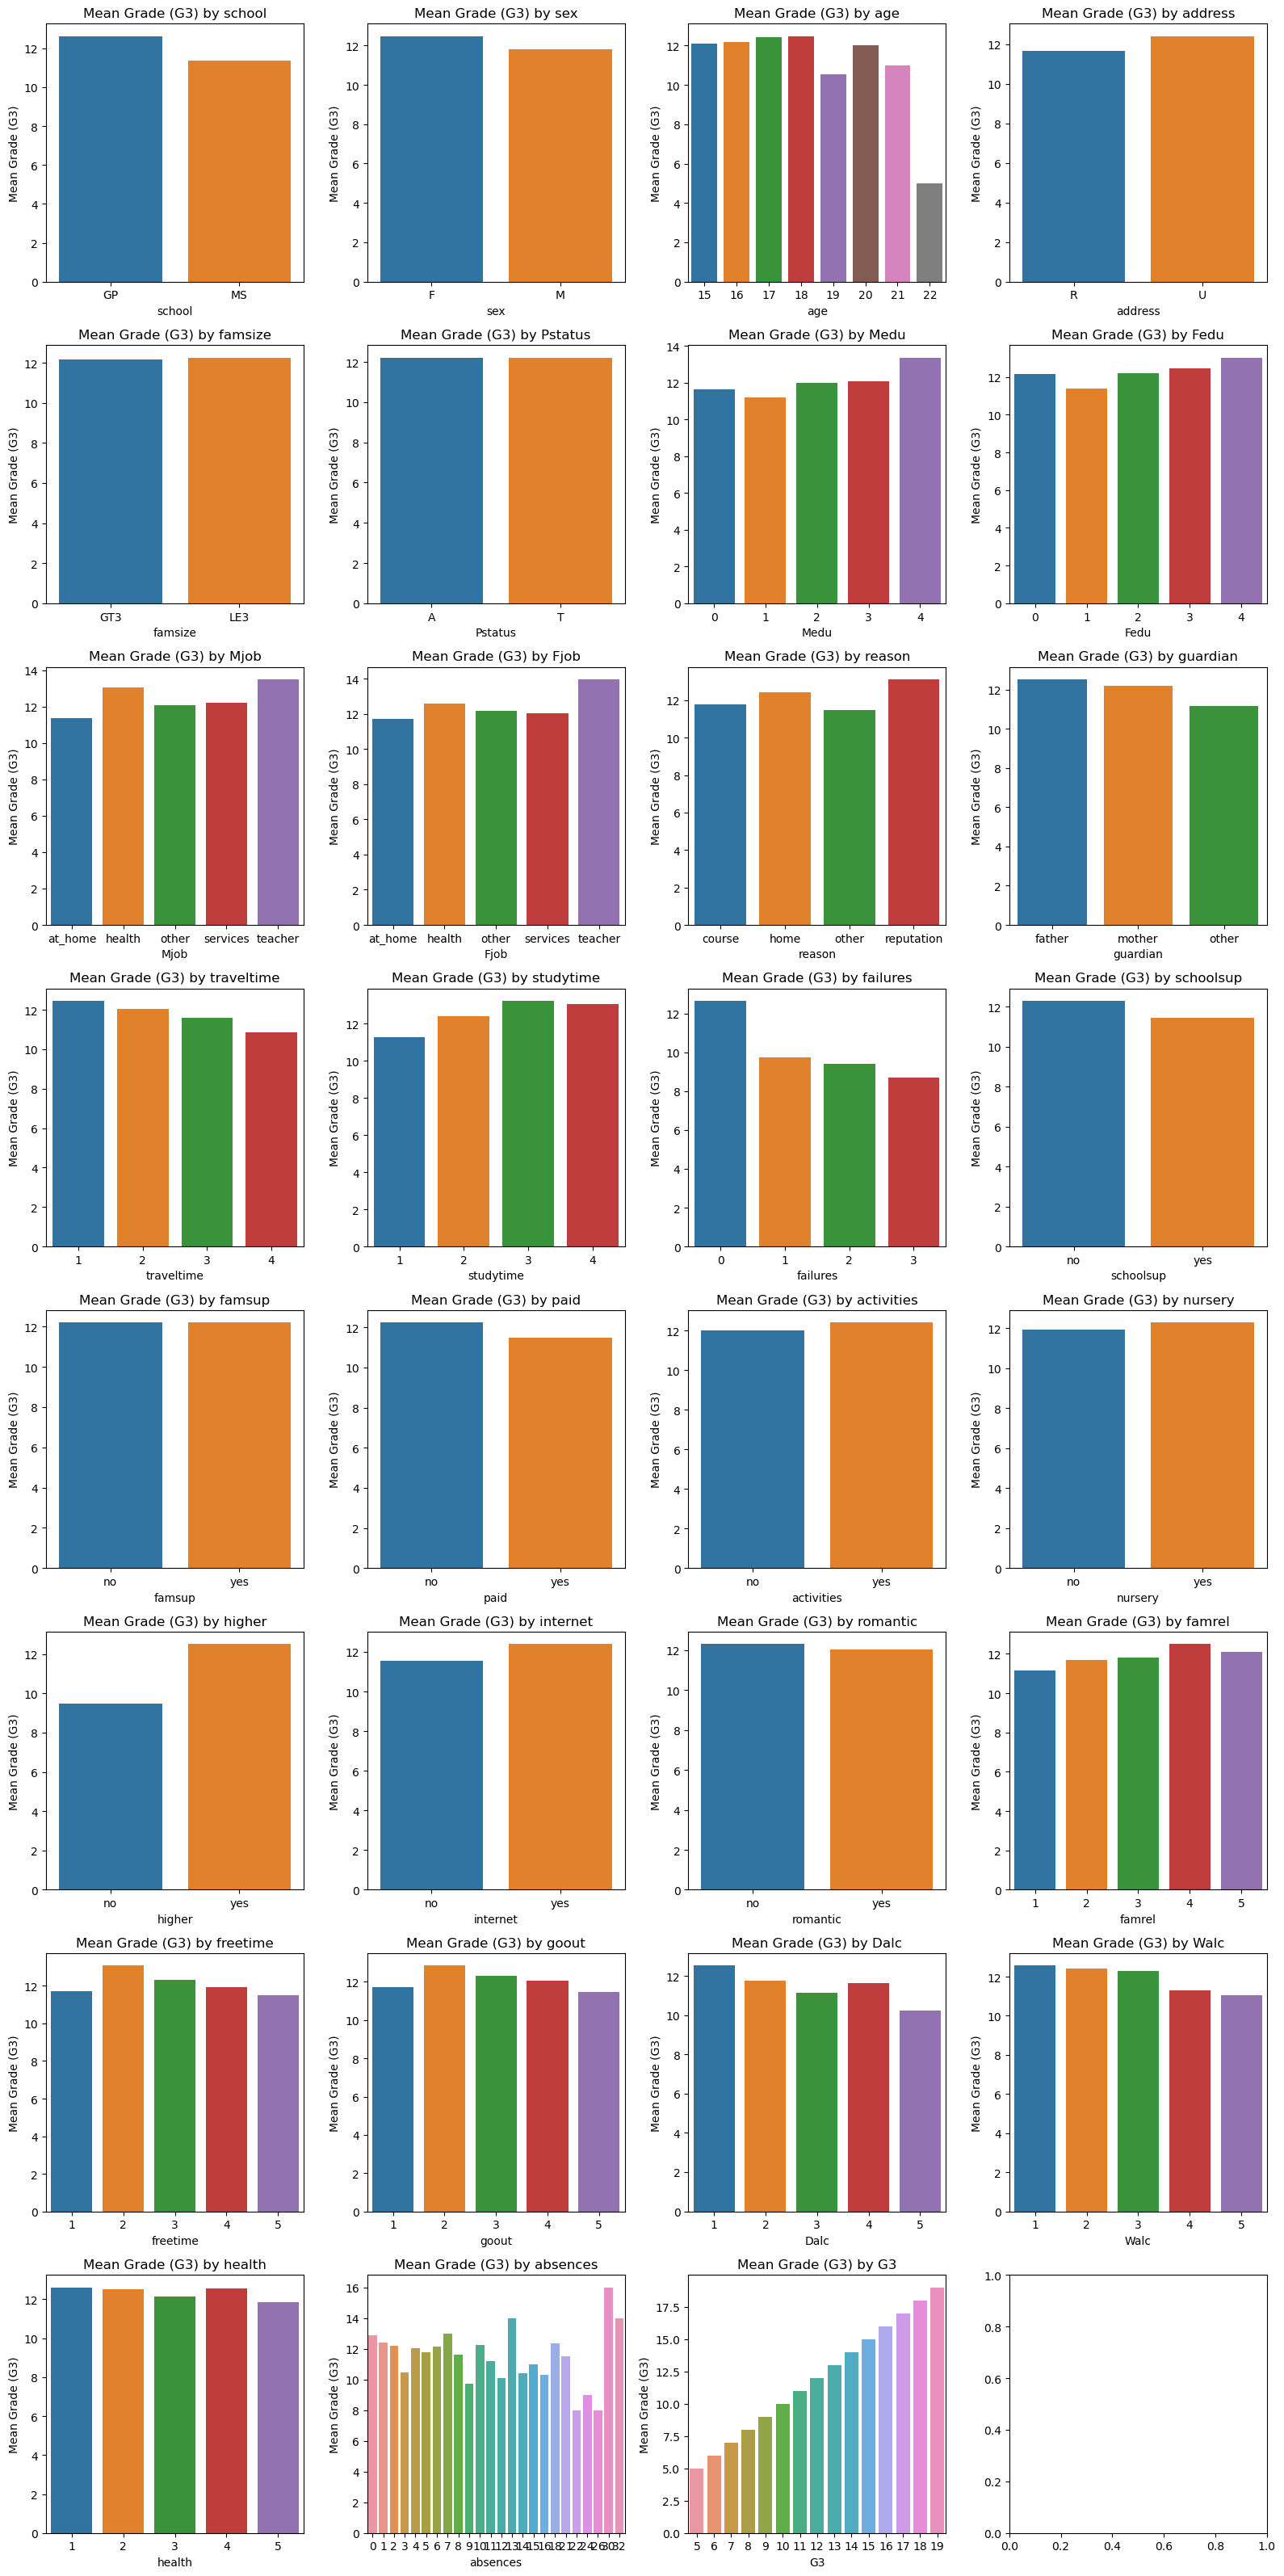

In [11]:
# Calculate the number of rows and columns needed for the subplots
num_cols = len(temp_data_load.columns)
num_rows = (num_cols - 1) // 4 + 1

# Create a figure and subplots for each column
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(16, 4*num_rows))

# Iterate through each column and create subplots
for i, column in enumerate(temp_data_load.columns):
    row_idx = i // 4
    col_idx = i % 4

    # Calculate the mean of G3_mat for each category in the current column
    mean_grades_by_column = temp_data_load.groupby(column)['G3'].mean()
    #mean_grades_by_column = temp_data_load['G3']

    # Plot the bar plot for G3_mat mean by category in the current column
    sns.barplot(x=mean_grades_by_column.index, y=mean_grades_by_column.values, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'Mean Grade (G3) by {column}')
    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_ylabel('Mean Grade (G3)')

# Adjust spacing between subplots for better presentation
plt.tight_layout()

# Show the plots
plt.show()

In [12]:
# Analysis of Age =22 records 
temp_data_load[temp_data_load['age']==22]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
277,GP,M,22,U,GT3,T,3,1,services,services,other,mother,1,1,3,no,no,no,no,no,no,yes,yes,5,4,5,5,5,1,12,5


###  Analyze the Age 22 record
Checking the record for age = 22 to see why he has lower grade and it seems he has lower grades due to multitude of factors 
like higher going out count, daily and weekend alcohol consumption, his reason of joining the school, higher absences and higher amount of past failures.
All these factors signals not good grades. However actuation and cautation cannot be concluded here so we will leave it here. 

In [13]:
temp_data_load.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,13


### Analyze the Higher Absence Records 

Looking at this information nothing could be concluded however only common thing is there access to internet, common goal of higher education and family education support and quality of family relationship being very high in most of the cases. 

Yes there are few have difference however they may be able compensate on other front. 

This analysis is observational and and its causation could not be established yet. So we will leave it here for now. 

In [14]:
temp_data_load[temp_data_load['absences']>=20]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
150,GP,F,15,U,GT3,A,3,3,services,services,home,mother,1,2,0,no,no,no,no,no,yes,no,yes,1,3,2,2,3,1,24,9
155,GP,M,17,U,GT3,T,2,1,other,other,home,mother,1,1,0,no,yes,no,no,yes,yes,yes,no,5,4,5,1,2,5,22,6
195,GP,F,17,U,LE3,T,3,3,other,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,yes,5,3,3,2,3,1,32,14
210,GP,F,17,U,GT3,T,4,4,services,teacher,home,mother,2,1,1,no,yes,no,no,yes,yes,yes,no,4,2,4,2,3,2,30,16
215,GP,F,17,R,GT3,T,2,2,other,other,reputation,mother,1,1,0,no,yes,no,no,yes,yes,yes,no,5,3,2,1,2,3,21,13
254,GP,M,18,U,GT3,T,2,2,other,at_home,course,other,1,1,1,no,yes,no,yes,no,no,yes,yes,4,4,3,2,2,1,26,8
323,GP,M,17,U,LE3,A,4,1,services,other,home,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,4,5,4,2,4,5,22,10
411,GP,M,21,R,LE3,T,1,1,at_home,other,course,other,2,2,2,no,yes,no,yes,yes,no,yes,yes,5,3,3,5,2,4,21,10


## Cleaning the data and defining the datatypes. 

In the below step we will define the datatype, convert the values to numerical values to be fed in data models and also create the dummies for categorical columns. 


In [15]:
temp_data_load['school'] = temp_data_load['school'].astype('category')
temp_data_load['sex'] = temp_data_load['sex'].astype('category')
temp_data_load['address'] = temp_data_load['address'].astype('category')
temp_data_load['famsize'] = temp_data_load['famsize'].astype('category')
temp_data_load['Pstatus'] = temp_data_load['Pstatus'].astype('category')
temp_data_load['Mjob'] = temp_data_load['Mjob'].astype('category')
temp_data_load['Fjob'] = temp_data_load['Fjob'].astype('category')
temp_data_load['reason'] = temp_data_load['reason'].astype('category')
temp_data_load['guardian'] = temp_data_load['guardian'].astype('category')
temp_data_load.head()



,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,13


In [16]:
# Create the dummies for categorical columns
df = pd.get_dummies(temp_data_load, prefix_sep='_', drop_first=True) #drop the first level due to dummy n-1 ID']
df.head()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,4,11,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,1,3,2,11,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,2,5,0,13,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0


### Normalize the model the attributes to the Standard value for any continuous variables


In [17]:
# Do the scaler fitting of attributes Age, Medu, Fedu, Travel Time, StudyTime, Failuers, Famrel, Freetime, Goout Dalc Walc

scaler_fiting_cols_list = ['age', 'Medu','Fedu','traveltime','studytime','failures','famrel','freetime',
                          'goout','Dalc','Walc','health','absences']
z_col_list = ['z_' + col for col in scaler_fiting_cols_list]
scaler = preprocessing.StandardScaler()
scaler.fit(df[scaler_fiting_cols_list])

df_norm = pd.concat([pd.DataFrame(scaler.transform(df[scaler_fiting_cols_list]), columns = z_col_list),df],axis=1)
df_norm = df_norm.drop(columns = scaler_fiting_cols_list)
df_norm.head()

,z_age,z_Medu,z_Fedu,z_traveltime,z_studytime,z_failures,z_famrel,z_freetime,z_goout,z_Dalc,z_Walc,z_health,z_absences,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,1.054848,1.306950,1.524682,0.581688,0.070202,-0.357697,0.071834,-0.161563,0.702066,-0.537145,-0.990474,-0.364595,0.053244,11,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0
1,0.230504,-1.341820,-1.199092,-0.752401,0.070202,-0.357697,1.129292,-0.161563,-0.159189,-0.537145,-0.990474,-0.364595,-0.376096,11,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
2,-1.418185,-1.341820,-1.199092,-0.752401,0.070202,-0.357697,0.071834,-0.161563,-1.020445,0.559670,0.571095,-0.364595,0.482583,12,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,1,0
3,-1.418185,1.306950,-0.291167,-0.752401,1.271221,-0.357697,-0.985625,-1.117353,-1.020445,-0.537145,-0.990474,1.017374,-0.805435,14,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,1,1
4,-0.593841,0.424026,0.616758,-0.752401,0.070202,-0.357697,0.071834,-0.161563,-1.020445,-0.537145,-0.209689,1.017374,-0.805435,13,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0


### Check the Corr matrix

Let's see the corealtion among the attributes to identify if we have correlation among the attributes and which attributes are related.

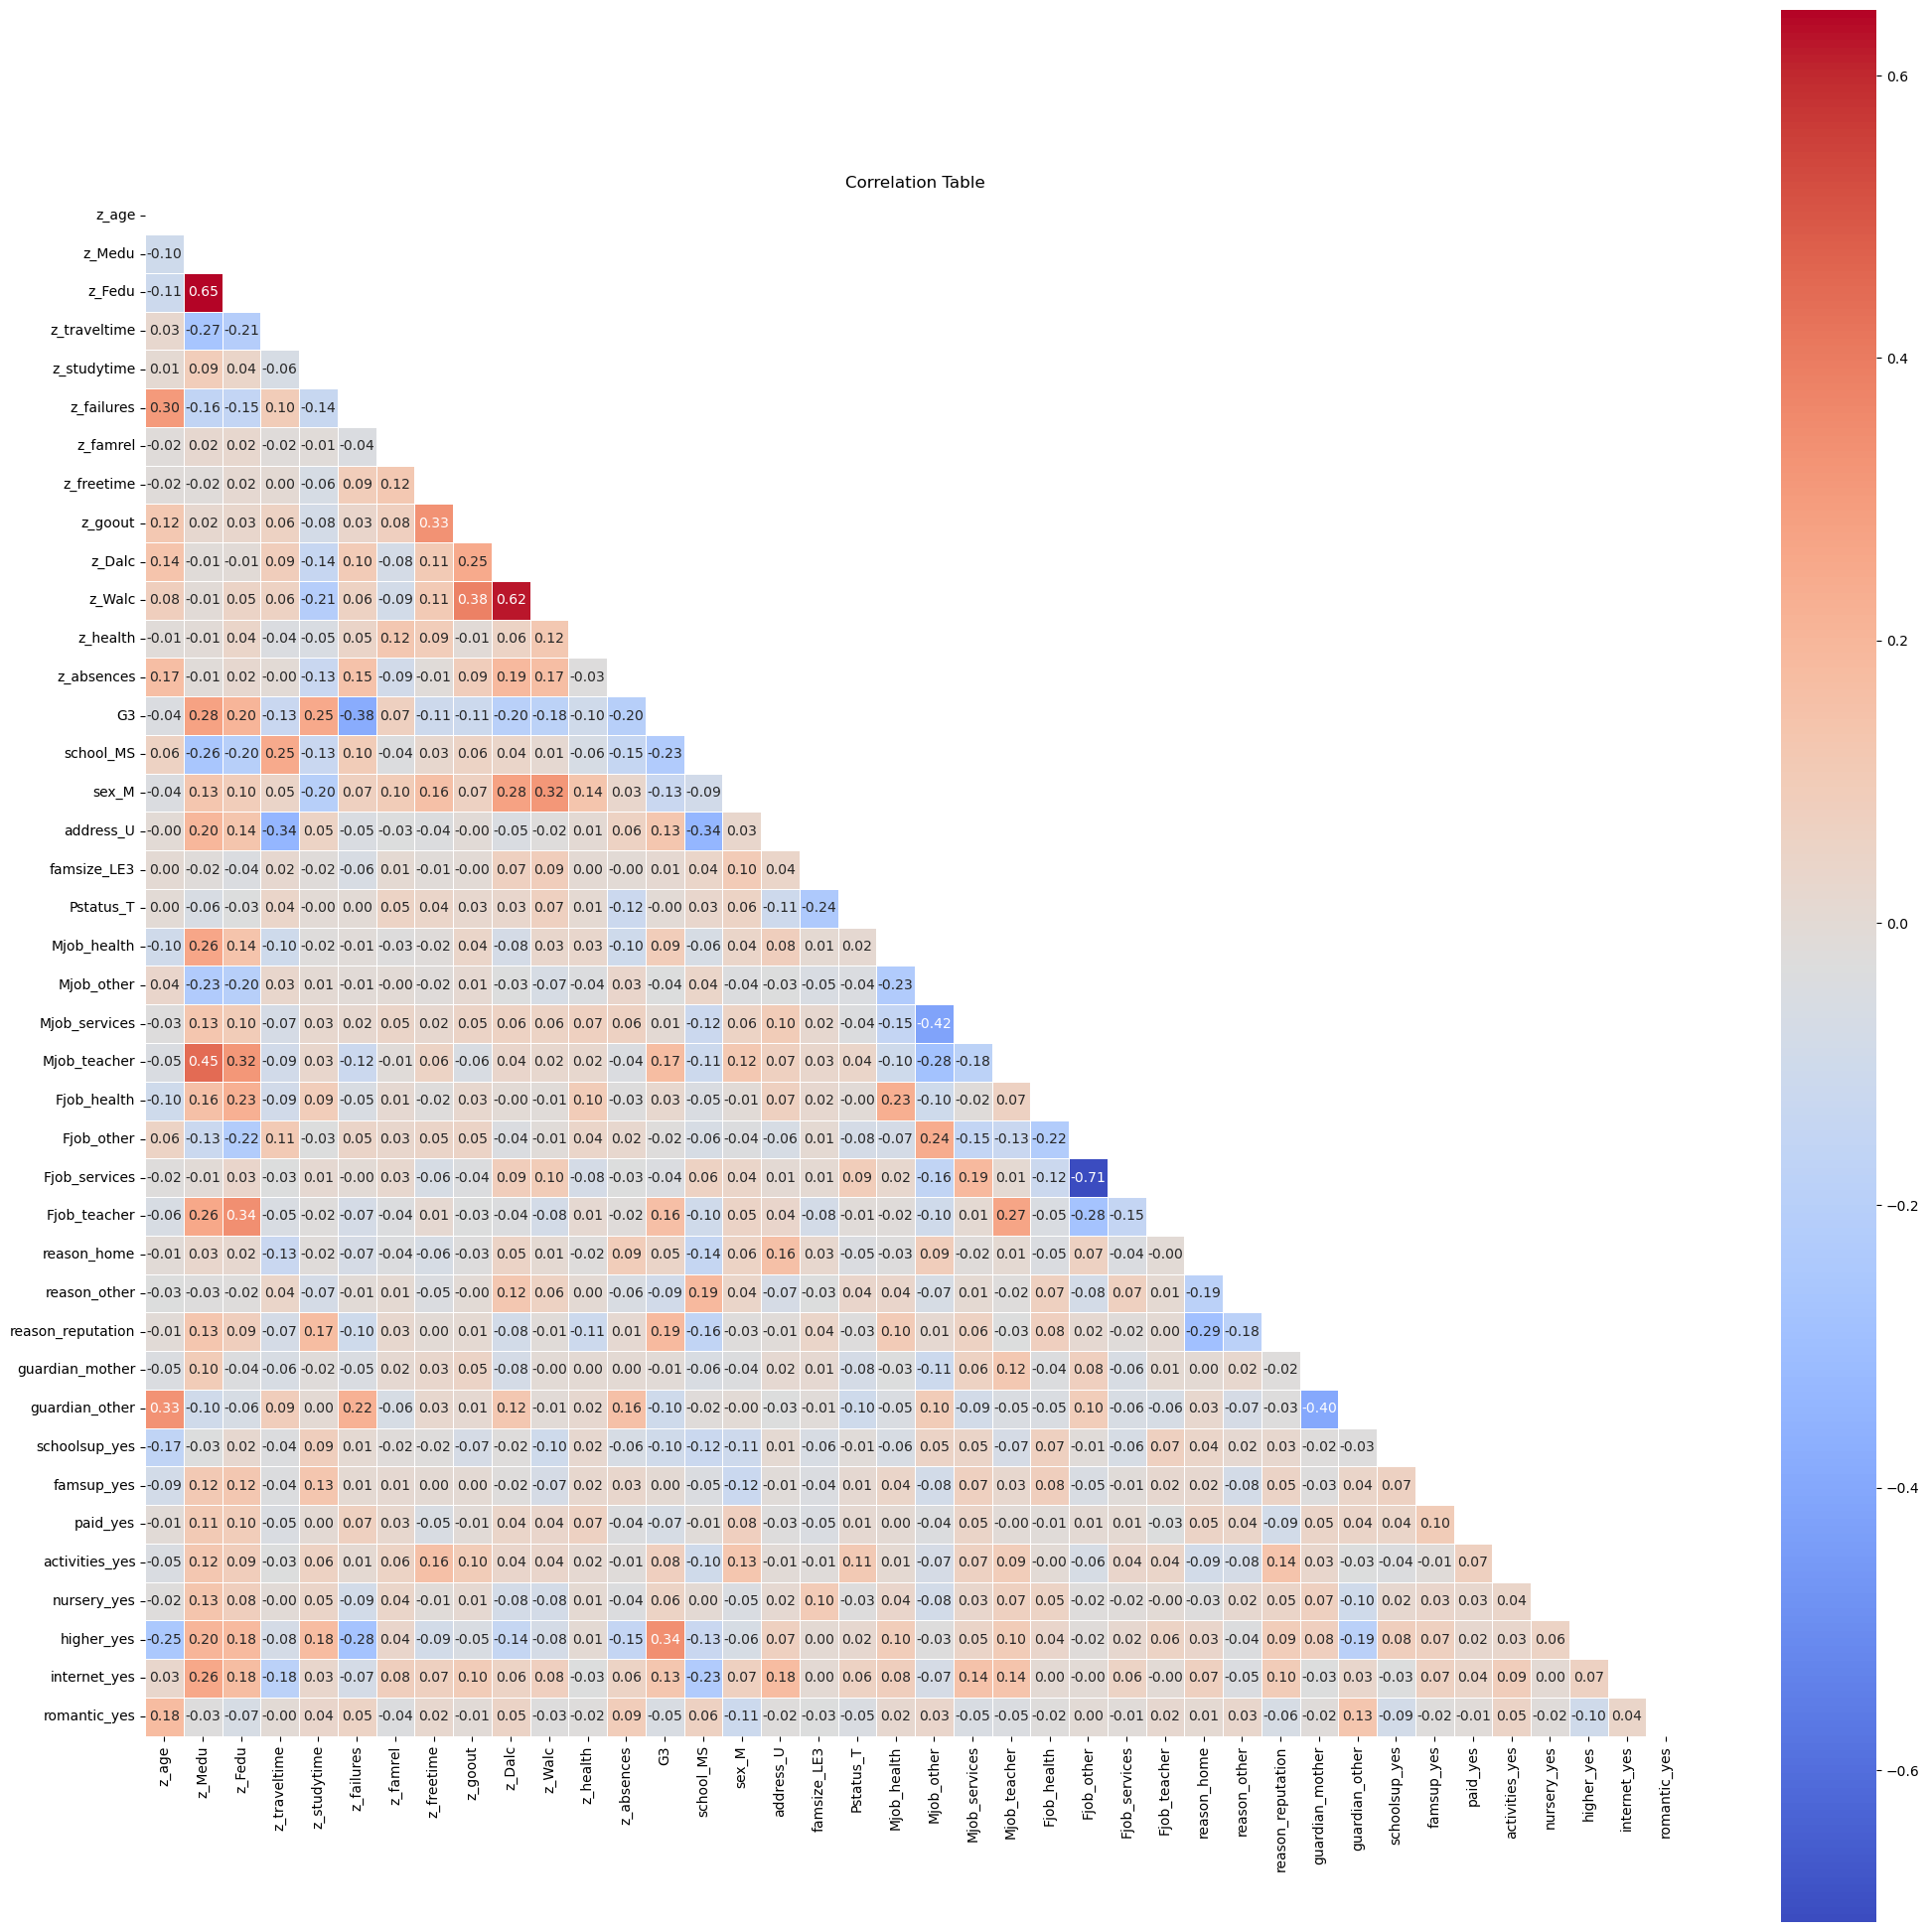

In [18]:
correlation_matrix = df_norm.corr()

# Create a mask for the upper half of the correlation table
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the correlation table as a heatmap with the upper half masked
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True, mask = mask )
plt.title('Correlation Table')
plt.show()

## Lets Plot the indexes in sorted order to visualize high impact attributes to G3

From the graph it seems higher education aspiration, Mother's education, Studytime, Father's education, studying for reputation, mother and fathers occupation as teacher, internet access and urban have positive correlation and 
past failures, school, absences, alcohol consumption, sex, going out and travel time have negative influence on the education grades of the students.

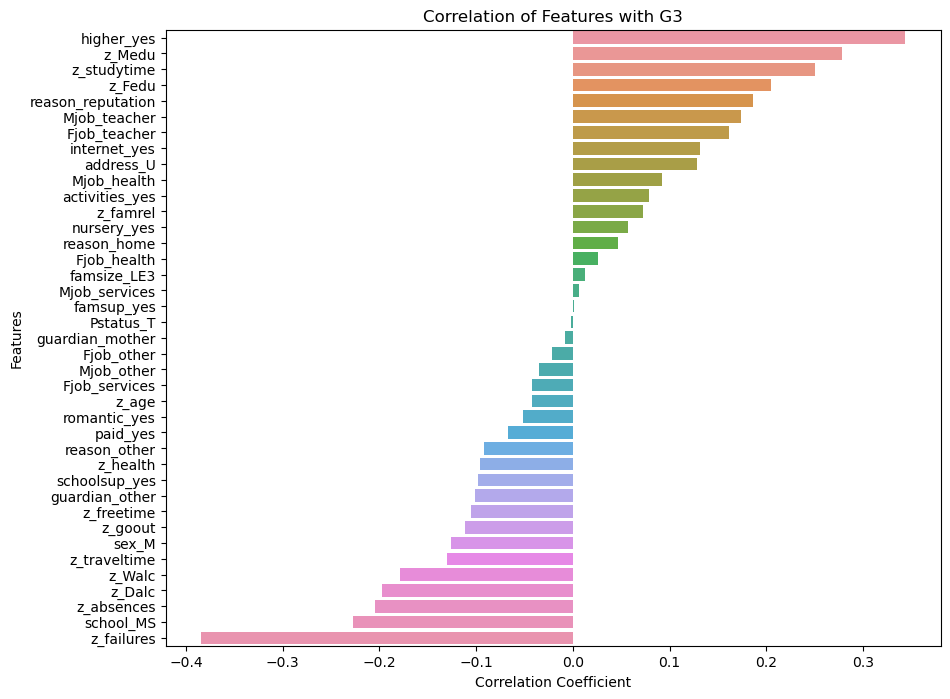

In [19]:
correlations = df_norm.corr()['G3'].drop('G3').sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title('Correlation of Features with G3')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

### Let's Calculate the VIF index to understand the multicollinearity among the variables. 

It is recommended to drop any variables whcih have VIF higher than 5 or use it with caution as they tend to show multi collinearity and have been influenced by other variables.

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# X is the design matrix (independent variables)
X = df_norm.drop(['G3'], axis =1)
print(X.columns)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values(by='VIF',ascending=False))


Index(['z_age', 'z_Medu', 'z_Fedu', 'z_traveltime', 'z_studytime',
       'z_failures', 'z_famrel', 'z_freetime', 'z_goout', 'z_Dalc', 'z_Walc',
       'z_health', 'z_absences', 'school_MS', 'sex_M', 'address_U',
       'famsize_LE3', 'Pstatus_T', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_mother', 'guardian_other',
       'schoolsup_yes', 'famsup_yes', 'paid_yes', 'activities_yes',
       'nursery_yes', 'higher_yes', 'internet_yes', 'romantic_yes'],
      dtype='object')
             Variable        VIF
36         higher_yes  10.707842
23         Fjob_other   8.231278
17          Pstatus_T   8.011992
37       internet_yes   5.334340
35        nursery_yes   4.984757
24      Fjob_services   4.655083
29    guardian_mother   4.130585
15          address_U   4.044509
19         Mjob_other   3.181300
32         famsup_yes   2.830

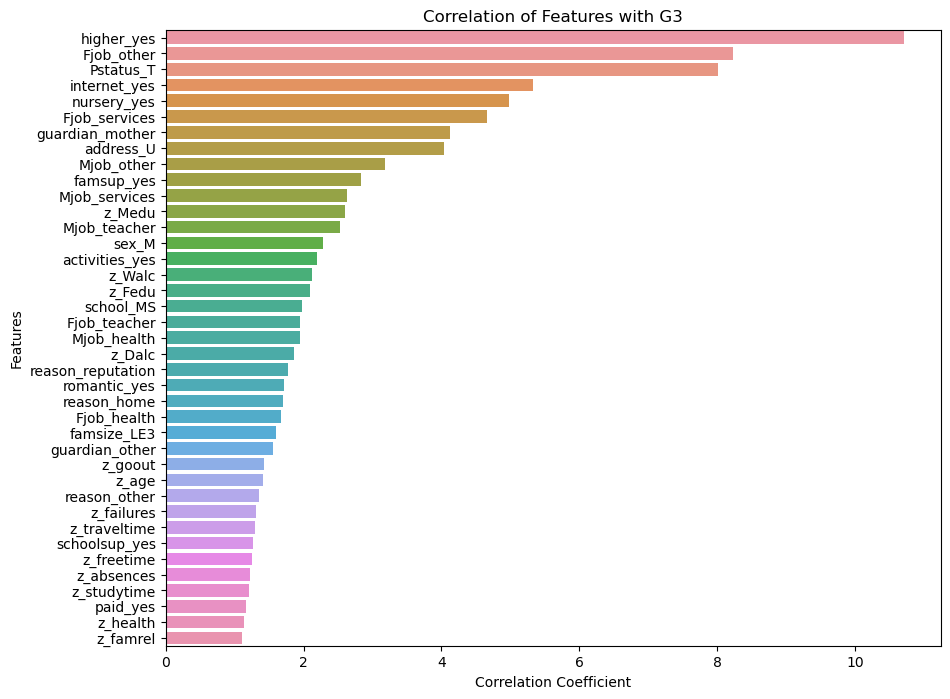

In [21]:
# PLot the VIF factor in descending order.
vif_data_sorted = vif_data.sort_values(by='VIF',ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=vif_data_sorted.VIF, y=vif_data_sorted.Variable)
plt.title('Correlation of Features with G3')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

In [22]:
df_norm.columns

Index(['z_age', 'z_Medu', 'z_Fedu', 'z_traveltime', 'z_studytime',
       'z_failures', 'z_famrel', 'z_freetime', 'z_goout', 'z_Dalc', 'z_Walc',
       'z_health', 'z_absences', 'G3', 'school_MS', 'sex_M', 'address_U',
       'famsize_LE3', 'Pstatus_T', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_mother', 'guardian_other',
       'schoolsup_yes', 'famsup_yes', 'paid_yes', 'activities_yes',
       'nursery_yes', 'higher_yes', 'internet_yes', 'romantic_yes'],
      dtype='object')

In [23]:
# Split the data in Training Data and Validation DatatrainData, validData = train_test_split(car_df, test_size=0.40, random_state=1)

num_bins = 4

# Create a new categorical column based on equal-frequency bins
df_norm['G3_bin'] = pd.qcut(df_norm['G3'], q=num_bins, labels=False, duplicates='drop')
print((df_norm.columns))
print(df_norm['G3_bin'].value_counts())
print(pd.DataFrame(df_norm.groupby('G3_bin')['G3'].agg(['min','max', 'count'])))

predictors = ['z_age', 'z_Medu', 'z_Fedu', 'z_traveltime', 'z_studytime','z_failures', 'z_famrel',
              'z_freetime', 'z_goout', 'z_Dalc', 'z_Walc','z_health', 'z_absences', 'schoolsup_yes',
              'famsup_yes', 'paid_yes', 'activities_yes','nursery_yes', 'higher_yes', 'internet_yes', 'romantic_yes','school_MS',
              'sex_M','address_U', 'famsize_LE3', 'Pstatus_T', 'Mjob_health', 'Mjob_other','Mjob_services',
              'Mjob_teacher', 'Fjob_health', 'Fjob_other','Fjob_services', 'Fjob_teacher', 'reason_home',
              'reason_other','reason_reputation', 'guardian_mother', 'guardian_other']
outcome = 'G3'
label_predictor = 'G3_bin'
X = df_norm[predictors]
y = df_norm[label_predictor]
train_X, valid_X, train_y, valid_y = train_test_split(X,y, test_size=0.35, random_state=42)
print('Training   : ', train_X.shape)
print('Validation : ', valid_X.shape)


Index(['z_age', 'z_Medu', 'z_Fedu', 'z_traveltime', 'z_studytime',
       'z_failures', 'z_famrel', 'z_freetime', 'z_goout', 'z_Dalc', 'z_Walc',
       'z_health', 'z_absences', 'G3', 'school_MS', 'sex_M', 'address_U',
       'famsize_LE3', 'Pstatus_T', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_mother', 'guardian_other',
       'schoolsup_yes', 'famsup_yes', 'paid_yes', 'activities_yes',
       'nursery_yes', 'higher_yes', 'internet_yes', 'romantic_yes', 'G3_bin'],
      dtype='object')
0    181
1    176
2    145
3    131
Name: G3_bin, dtype: int64
        min  max  count
G3_bin                 
0         5   10    181
1        11   12    176
2        13   14    145
3        15   19    131
Training   :  (411, 39)
Validation :  (222, 39)


0    181
1    176
2    145
3    131
Name: G3_bin, dtype: int64


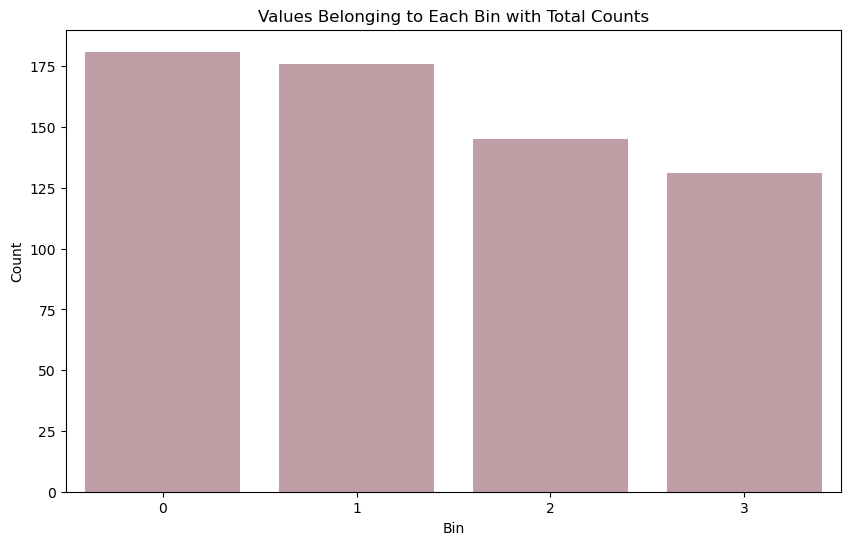

In [24]:
# plot bins information to understand its distribution
count_per_bin = df_norm['G3_bin'].value_counts().sort_index()
print(count_per_bin)
# Plot the information using seaborn
plt.figure(figsize=(10, 6))
# Grouped bar plot showing which values belong to which bin
sns.barplot(x='G3_bin', y='G3', data=df_norm, color='red', errorbar=None, estimator=lambda x: len(x))
# Stacked bar plot showing the total counts per bin
sns.barplot(x=count_per_bin.index, y=count_per_bin.values, color='lightblue', alpha=0.7)

# Adding labels and title
plt.title('Values Belonging to Each Bin with Total Counts')
plt.xlabel('Bin')
plt.ylabel('Count')

# Display the plot
plt.show()

In [25]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

bestBE_model, bestbe_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)


print(bestbe_variables)


Variables: z_age, z_Medu, z_Fedu, z_traveltime, z_studytime, z_failures, z_famrel, z_freetime, z_goout, z_Dalc, z_Walc, z_health, z_absences, schoolsup_yes, famsup_yes, paid_yes, activities_yes, nursery_yes, higher_yes, internet_yes, romantic_yes, school_MS, sex_M, address_U, famsize_LE3, Pstatus_T, Mjob_health, Mjob_other, Mjob_services, Mjob_teacher, Fjob_health, Fjob_other, Fjob_services, Fjob_teacher, reason_home, reason_other, reason_reputation, guardian_mother, guardian_other
Start: score=1118.85
Step: score=1116.85, remove Fjob_teacher
Step: score=1114.86, remove Mjob_other
Step: score=1112.87, remove romantic_yes
Step: score=1110.91, remove guardian_other
Step: score=1108.96, remove z_freetime
Step: score=1107.03, remove Mjob_services
Step: score=1105.18, remove famsup_yes
Step: score=1103.39, remove reason_other
Step: score=1101.64, remove address_U
Step: score=1099.90, remove activities_yes
Step: score=1098.14, remove nursery_yes
Step: score=1096.58, remove Mjob_health
Step: 

In [26]:
regressionSummary(valid_y, bestBE_model.predict(valid_X[bestbe_variables]))


Regression statistics

               Mean Error (ME) : 0.0212
Root Mean Squared Error (RMSE) : 0.9816
     Mean Absolute Error (MAE) : 0.8139


In [27]:
# BEst Model is 
col_list = bestbe_variables
#outcome = 'G3'
grade_lm = LinearRegression()
grade_lm.fit(train_X[col_list], train_y)

# print coefficients
print('intercept ', grade_lm.intercept_)
print(pd.DataFrame({'Predictor': col_list, 'coefficient': grade_lm.coef_}))

# print performance measures
print(regressionSummary(train_y, grade_lm.predict(train_X[col_list])))

pred_y = grade_lm.predict(train_X[col_list])

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, grade_lm))
print('AIC : ', AIC_score(train_y, pred_y, grade_lm))
print('BIC : ', BIC_score(train_y, pred_y, grade_lm))


intercept  1.2228448518811723
            Predictor  coefficient
0         z_studytime     0.154383
1          z_failures    -0.252755
2            z_famrel     0.064940
3            z_health    -0.075270
4          z_absences    -0.173099
5       schoolsup_yes    -0.601194
6          higher_yes     0.719596
7           school_MS    -0.513364
8               sex_M    -0.278409
9        Mjob_teacher     0.469715
10        Fjob_health    -0.527434
11         Fjob_other    -0.257072
12      Fjob_services    -0.452015
13  reason_reputation     0.298566

Regression statistics

               Mean Error (ME) : -0.0000
Root Mean Squared Error (RMSE) : 0.8718
     Mean Absolute Error (MAE) : 0.7144
None
adjusted r2 :  0.35280277889614864
AIC :  1085.54631800051
BIC :  1149.8438094324497


In [28]:
# Validation Data 

# Use predict() to make predictions on a new set
grade_lm_pred = grade_lm.predict(valid_X[col_list])

result = pd.DataFrame({'Predicted': grade_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - grade_lm_pred})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(valid_y, grade_lm_pred)

     Predicted  Actual  Residual
329   1.926291       1 -0.926291
247   2.284399       1 -1.284399
390   2.010154       3  0.989846
145   1.520071       0 -1.520071
497  -0.448724       0  0.448724
513   2.052429       3  0.947571
165   0.756830       1  0.243170
77    2.659055       2 -0.659055
534   1.451858       1 -0.451858
163   0.730479       0 -0.730479
271   1.667949       1 -0.667949
31    1.605020       3  1.394980
55    2.004507       1 -1.004507
90    2.017232       1 -1.017232
576   0.229733       0 -0.229733
76    2.555632       1 -1.555632
2     1.133995       1 -0.133995
256   1.878179       3  1.121821
311   1.883826       2  0.116174
334   1.971111       3  1.028889

Regression statistics

               Mean Error (ME) : 0.0212
Root Mean Squared Error (RMSE) : 0.9816
     Mean Absolute Error (MAE) : 0.8139


Let us remove the high VIF variables to see the impact on the model
Given that the regression model has these attributes ['z_studytime', 'z_failures', 'z_famrel', 'z_health', 'z_absences', 'schoolsup_yes', 'higher_yes', 'school_MS', 'sex_M', 'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'reason_reputation']

It makes sense to remove the high VIF index variables to reduce the multicollinearity.

However, we want keep higher_yes as it means the student have expectations for further studying and we believe it should influence the approach towards their education and reflect seriousness towards education.

But there is debatable counter argument such that it could just be a wrong data as its accuracy could not be predicted and directly associated to the student as its just a future event. Anyone can say they have higher education aspirations and how many follow through with it is debatable. 
So we are inclined to take such attributes out of our model which are not current facts and something in future.

Also we are inclined to create one more variable if either of the parent is working more than one job, then what would be the impact. This will mean that student see less of the parent. In order to validate this we need to check the data first. 


In [29]:
columns_to_sum = ['Fjob_health', 'Fjob_other','Fjob_services', 'Fjob_teacher']
temp_data = pd.DataFrame()
temp_data['sum_of_Fjob'] = df_norm[columns_to_sum].sum(axis=1)

df_norm.loc[temp_data['sum_of_Fjob']>=2].head()

,z_age,z_Medu,z_Fedu,z_traveltime,z_studytime,z_failures,z_famrel,z_freetime,z_goout,z_Dalc,z_Walc,z_health,z_absences,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,G3_bin


It appears that there are no data points which indicate that father is working two jobs and hence the impact would be more driven from the fact that which kind of job sector is in. So we will keep fathers job sectors in analysis.

So the updated list becomes - 
['z_studytime', 'z_failures', 'z_famrel', 'z_health', 'z_absences',
 'schoolsup_yes', 'school_MS', 'sex_M', 'Mjob_teacher',
 'Fjob_health', 'Fjob_services', 'reason_reputation']
 
So we gonna train the model with these and see what the results we get.


In [30]:
updated_predictors = ['z_studytime', 'z_failures', 'z_famrel', 'z_health', 'z_absences',
                      'schoolsup_yes', 'school_MS', 'sex_M', 'Mjob_teacher','Fjob_health',
                      'Fjob_services', 'reason_reputation']
# Best Model is 
col_list = updated_predictors
outcome = 'G3'
vif_grade_lm = LinearRegression()
vif_grade_lm.fit(train_X[col_list], train_y)

# print coefficients
print('intercept ', vif_grade_lm.intercept_)
print(pd.DataFrame({'Predictor': col_list, 'coefficient': vif_grade_lm.coef_}))

# print performance measures
print(regressionSummary(train_y, vif_grade_lm.predict(train_X[col_list])))

pred_y = vif_grade_lm.predict(train_X[col_list])

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, vif_grade_lm))
print('AIC : ', AIC_score(train_y, pred_y, vif_grade_lm))
print('BIC : ', BIC_score(train_y, pred_y, vif_grade_lm))

# Validation Data 

# Use predict() to make predictions on a new set
vif_grade_lm_pred = vif_grade_lm.predict(valid_X[col_list])

result = pd.DataFrame({'Predicted': vif_grade_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - vif_grade_lm_pred})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(valid_y, vif_grade_lm_pred)


intercept  1.6259639843896965
            Predictor  coefficient
0         z_studytime     0.186416
1          z_failures    -0.290868
2            z_famrel     0.053646
3            z_health    -0.072550
4          z_absences    -0.197613
5       schoolsup_yes    -0.508348
6           school_MS    -0.543775
7               sex_M    -0.263777
8        Mjob_teacher     0.575553
9         Fjob_health    -0.273077
10      Fjob_services    -0.216441
11  reason_reputation     0.325079

Regression statistics

               Mean Error (ME) : -0.0000
Root Mean Squared Error (RMSE) : 0.8979
     Mean Absolute Error (MAE) : 0.7379
None
adjusted r2 :  0.3168205826874245
AIC :  1105.8545994699402
BIC :  1162.1149044728875
     Predicted  Actual  Residual
329   1.943735       1 -0.943735
247   2.324615       1 -1.324615
390   1.982694       3  1.017306
145   1.438725       0 -1.438725
497   0.046313       0 -0.046313
513   1.763998       3  1.236002
165   1.140237       1 -0.140237
77    2.719729 

# Comparing updated Model wrt to New model after dropping Multicollinear columns

After comparing both the models it appears that model's efficiency has not reduced drastically and we could see that it faired similar. So it makes sense to drop the columns with higher VIF >5 and focus on only remaining columns. 

The final list of variables is -

['z_studytime', 'z_failures', 'z_famrel', 'z_health', 'z_absences','schoolsup_yes', 'school_MS', 'sex_M', 'Mjob_teacher','Fjob_health','Fjob_services', 'reason_reputation']

Among all the variables it could be noted that for some variables we as a society cannot do much and its comes with a package, however we can try to focus on the variables which could influence the behaviour and outcome.

For example, we notice that student health, student absences, and study time are key contributing factors which we could influence as well. 

Analysis of Key Factors which could be influenced and affecting Student performance

##### 1. Health
The health of students is a crucial aspect that significantly impacts their academic performance. Ensuring good health is not only vital from an educational perspective but also contributes to the overall well-being of students. Education departments and school authorities can play a pivotal role by focusing on initiatives such as health insurance coverage and regular health check-ups. This proactive approach can address health-related challenges that students might face at home.

##### 2. Student Absences:
Managing and reducing student absences is essential for maintaining a consistent learning environment. Communication with parents and implementing strict attendance policies may positively influence attendance rates. A deeper analysis could explore additional factors contributing to high absences, such as alcohol consumption, late-night activities on weekdays, and involvement in extracurricular activities. However, for the current analysis, the focus will be limited to understanding the impact of absences on academic grades.

##### 3. Study Time:
The amount of time students dedicate to studying is influenced by various factors, including the role of authorities, parents, and the broader societal context. Conducting a comprehensive study to identify reasons behind variations in study time—whether low or high—can provide insights into effective strategies. Understanding and addressing these factors can contribute to the development of initiatives that promote optimal study habits among students.




# kNN for Predicting

With the multiple regression model we were able to gain decent insights and could predict the grade ranges with decent accuracy. However, we can also try to explore the other modeling techniques to establish and identify if we could establish any new model which can give us any better results. 

We could use kNN and see if it could which neghbors share the grades and what traights are common and what we could do influence them as an exercise. 

If this model gives us more insights and better results we can observe and take actions based on it. 

As a base exercise what we did is we ran a grid search on the column list we figured in multiple linear regression model above and see if it could fit better here?

After grid search it results revealed that its is giving a prediction accuracy of 34% which is slightly above the Naive model accuracy of 28.59% is not a significant gain. 

So we will not invest much in it and move to another modeling technique of  classification Trees

In [31]:
# Naive Model accuracy Calculation 
naive_df = df_norm['G3_bin'].value_counts()
print('Naive Model\'s accuracy is : ',round((naive_df.max()/naive_df.sum())*100,2),'%')

Naive Model's accuracy is :  28.59 %


In [32]:
all_cols = ['z_age', 'z_Medu', 'z_Fedu', 'z_traveltime', 'z_studytime','z_failures', 'z_famrel',
              'z_freetime', 'z_goout', 'z_Dalc', 'z_Walc','z_health', 'z_absences', 'schoolsup_yes',
              'famsup_yes', 'paid_yes', 'activities_yes','nursery_yes', 'higher_yes', 'internet_yes', 'romantic_yes','school_MS',
              'sex_M','address_U', 'famsize_LE3', 'Pstatus_T', 'Mjob_health', 'Mjob_other','Mjob_services',
              'Mjob_teacher', 'Fjob_health', 'Fjob_other','Fjob_services', 'Fjob_teacher', 'reason_home',
              'reason_other','reason_reputation', 'guardian_mother', 'guardian_other']
print(all_cols)

['z_age', 'z_Medu', 'z_Fedu', 'z_traveltime', 'z_studytime', 'z_failures', 'z_famrel', 'z_freetime', 'z_goout', 'z_Dalc', 'z_Walc', 'z_health', 'z_absences', 'schoolsup_yes', 'famsup_yes', 'paid_yes', 'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes', 'romantic_yes', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother', 'guardian_other']


### Knn with all columns

In [33]:
# Knn with all columns
# Identify the best kNN and see its performance

knn_classifier = KNeighborsClassifier()
# Define the hyperparameter grid for grid search
param_grid = {
    'n_neighbors': list(range(1,15)),  # Adjust the values based on your requirements
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn_classifier, param_grid, scoring='accuracy')
grid_search.fit(train_X[all_cols], train_y)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set
pred_y = best_model.predict(valid_X[all_cols])

# Evaluate the best model
accuracy = accuracy_score(valid_y, pred_y)
print(f'Best Model - Accuracy: {accuracy:.4f}')
print('Best Model - Best Parameters:', best_params)

result = pd.DataFrame({'Predicted': pred_y, 'Actual': valid_y,
                       'Residual': valid_y - pred_y})
print(result.head())


Best Model - Accuracy: 0.3604
Best Model - Best Parameters: {'n_neighbors': 2}
     Predicted  Actual  Residual
329          1       1         0
247          2       1        -1
390          2       3         1
145          2       0        -2
497          1       0        -1


### KNN with only columns from final agreed multiple regression analysis

In [34]:
# Identify the best kNN and see its performance

knn_classifier = KNeighborsClassifier()
# Define the hyperparameter grid for grid search
param_grid = {
    'n_neighbors': list(range(1,15)),  # Adjust the values based on your requirements
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn_classifier, param_grid, scoring='accuracy')
grid_search.fit(train_X[col_list], train_y)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set
pred_y = best_model.predict(valid_X[col_list])

# Evaluate the best model
accuracy = accuracy_score(valid_y, pred_y)
print(f'Best Model - Accuracy: {accuracy:.4f}')
print('Best Model - Best Parameters:', best_params)

result = pd.DataFrame({'Predicted': pred_y, 'Actual': valid_y,
                       'Residual': valid_y - pred_y})
print(result.head())

Best Model - Accuracy: 0.3423
Best Model - Best Parameters: {'n_neighbors': 9}
     Predicted  Actual  Residual
329          3       1        -2
247          3       1        -2
390          2       3         1
145          0       0         0
497          0       0         0


# Classification Trees 

In this method we gonna train the mdeol for the colums we identified and notice if we could improve the performance of the model using a new technique. This model is good in identifying student traights and see if we could do anything if the accuracy is good. 

We ran a grid search on the model using param grid and noticed it attained a total accuracy of 36.94% which is pretty much the same for the kNN and hence we wil stop here and will not divulge more into its analysis further an move on to next technique as Random Forrest.

In [35]:
# Start with an all parameters
param_grid = {
    'max_depth': [3,5,10, 20, 30, 40], 
    'min_samples_split': [10, 15, 20, 40, 60, 80, 100,150], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1) #n_jobs=-1 means 
        #that the availalbe computer memory (CPU) will be used to make calculations faster. 
gridSearch.fit(train_X[all_cols], train_y)
print('Initial best score: ', gridSearch.best_score_)
print('Initial Best parameters: ', gridSearch.best_params_)

Initial best score:  0.43076697032030564
Initial Best parameters:  {'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 80}


In [36]:
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [3,5,10, 20, 30, 40], 
    'min_samples_split': [10, 15, 20, 40, 60, 80, 100,150], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1) #n_jobs=-1 means 
        #that the availalbe computer memory (CPU) will be used to make calculations faster. 
gridSearch.fit(train_X[col_list], train_y)
print('Initial best score: ', gridSearch.best_score_)
print('Initial Best parameters: ', gridSearch.best_params_)

Initial best score:  0.396620628856891
Initial Best parameters:  {'max_depth': 3, 'min_impurity_decrease': 0, 'min_samples_split': 100}


In [37]:
# Adapt grid based on result from initial grid search
param_grid = {
    'max_depth': list(range(2, 16)), 
    'min_samples_split': list(range(70, 90)), 
    'min_impurity_decrease': [0.0001,0.0009, 0.001, 0.0011], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_

Improved score:  0.43564501910079345
Improved parameters:  {'max_depth': 8, 'min_impurity_decrease': 0.0001, 'min_samples_split': 82}


In [38]:
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.3694)

       Prediction
Actual  0  1  2  3
     0 44  8  4  3
     1 23 20 10 12
     2 12 14  6 17
     3 17  4 16 12


# Random Forrest 

In this methdo we ran a Random forrest on all the attributes and tried to indetify most important attributes and then run the model on the high important attributes to see if we have any improvement.


In [39]:
rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=500, random_state=1)

              feature  importance       std
12         z_absences    0.062206  0.020379
4         z_studytime    0.050927  0.017259
0               z_age    0.049788  0.018285
8             z_goout    0.048520  0.018143
2              z_Fedu    0.047774  0.018038
11           z_health    0.046831  0.018110
7          z_freetime    0.045443  0.016959
1              z_Medu    0.044439  0.016645
10             z_Walc    0.044092  0.016456
5          z_failures    0.044087  0.025917
6            z_famrel    0.037268  0.015042
3        z_traveltime    0.030566  0.014392
21          school_MS    0.027013  0.013215
9              z_Dalc    0.026381  0.012438
24        famsize_LE3    0.022955  0.011957
18         higher_yes    0.022817  0.016692
22              sex_M    0.021547  0.011707
37    guardian_mother    0.021497  0.011840
16     activities_yes    0.021388  0.011200
14         famsup_yes    0.020897  0.011855
23          address_U    0.020872  0.011169
36  reason_reputation    0.02004

<Figure size 1500x2500 with 0 Axes>

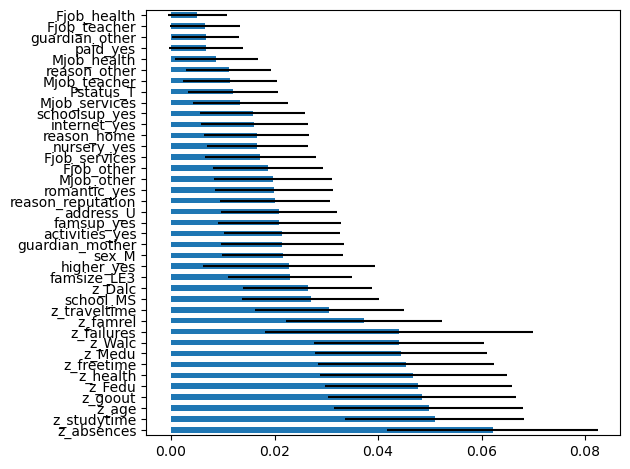

In [40]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance', ascending=False)
print(df)
plt.figure(figsize=(15, 25))
ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

### Variables with high importance factors are -
       1. z_absences
       2. z_studytime
       3. z_age
       4. z_goout
       5. z_Fedu
       6. z_health
       7. z_freetime
       8. z_Medu
       9. z_Walc
       10. z_failures
       11. z_famrel
       
We will do the boost with the above attributes and notice if there is any change?


In [41]:
rand_frst_col_list = ['z_absences','z_studytime','z_age','z_goout','z_Fedu','z_health',
                      'z_freetime','z_Medu','z_Walc','z_failures','z_famrel']
boost = GradientBoostingClassifier()
boost.fit(train_X[rand_frst_col_list], train_y)
classificationSummary(valid_y, boost.predict(valid_X[rand_frst_col_list]))

Confusion Matrix (Accuracy 0.3604)

       Prediction
Actual  0  1  2  3
     0 27 17  7  8
     1 21 20 14 10
     2  9 15 12 13
     3  6 10 12 21


## lets run multiple regression on the above columns as well to notice if we have better results?

It seems the results are kind of tied up and hence we gonna stick with the old model only. However, it is debatable from the fact that the new model has more variables which could be influenced by external factors to influence the Grades. 
So a rational perspective is to include the variables and stick with a slight reduction in accuracy and more controlling power on the influencing factors. 

So the updated list of variables is 

'z_absences','z_studytime','z_age','z_goout','z_Fedu','z_health','z_freetime','z_Medu','z_Walc','z_failures','z_famrel'

From the above list variables that we could influence externally are

1. Absence
2. Studytime
3. Goout
4. Health
5. Freetime
6. Weekend Alcohol Consumptions
7. Family Relations

These above variables may define the grades and students approach to the study. A small change or effort on the above list which changes the favors in better grade we could impact the grade and betterment of society as a whole. 


In [42]:
# Multiple Regression after Random Forrest 
col_list = rand_frst_col_list
rndm_grade_lm = LinearRegression()
rndm_grade_lm.fit(train_X[col_list], train_y)

# print coefficients
print('intercept ', rndm_grade_lm.intercept_)
print(pd.DataFrame({'Predictor': col_list, 'coefficient': rndm_grade_lm.coef_}))

# print performance measures
print(regressionSummary(train_y, rndm_grade_lm.predict(train_X[col_list])))

pred_y = rndm_grade_lm.predict(train_X[col_list])

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, rndm_grade_lm))
print('AIC : ', AIC_score(train_y, pred_y, rndm_grade_lm))
print('BIC : ', BIC_score(train_y, pred_y, rndm_grade_lm))

# Validation Data 

# Use predict() to make predictions on a new set
rndm_grade_lm_pred = rndm_grade_lm.predict(valid_X[col_list])

result = pd.DataFrame({'Predicted': rndm_grade_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - rndm_grade_lm_pred})
print(result.head(20))

# Compute common accuracy measures
print('Random Forrest Generated Variable Model Summary')
regressionSummary(valid_y, rndm_grade_lm_pred)

print('\nVIF Fixed Model Summary ')
regressionSummary(valid_y, vif_grade_lm_pred)


intercept  1.3264315334451535
      Predictor  coefficient
0    z_absences    -0.163113
1   z_studytime     0.230278
2         z_age     0.095586
3       z_goout    -0.045332
4        z_Fedu     0.089760
5      z_health    -0.077227
6    z_freetime    -0.021675
7        z_Medu     0.150442
8        z_Walc    -0.019077
9    z_failures    -0.329948
10     z_famrel     0.052846

Regression statistics

               Mean Error (ME) : 0.0000
Root Mean Squared Error (RMSE) : 0.9540
     Mean Absolute Error (MAE) : 0.7936
None
adjusted r2 :  0.23066781438127193
AIC :  1153.698519088712
BIC :  1205.940230877163
     Predicted  Actual  Residual
329   1.297840       1 -0.297840
247   1.990478       1 -0.990478
390   1.775865       3  1.224135
145   1.231638       0 -1.231638
497   0.205498       0 -0.205498
513   1.953847       3  1.046153
165   1.250343       1 -0.250343
77    2.066557       2 -0.066557
534   1.586544       1 -0.586544
163   0.137119       0 -0.137119
271   1.644406       1 -0

## Summary 

Yes the mean error has increased and RMSE has decreased we will stick to the new model as it gives more opportunity to course correct the grades and influence the behaviour. 